## ACV Profiles with Linear Regression

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Import data sheet
df = pd.read_csv('Sample1/Name(ACVProfile).csv')

In [3]:
# drop Date column
df = df.drop('Date', axis=1)

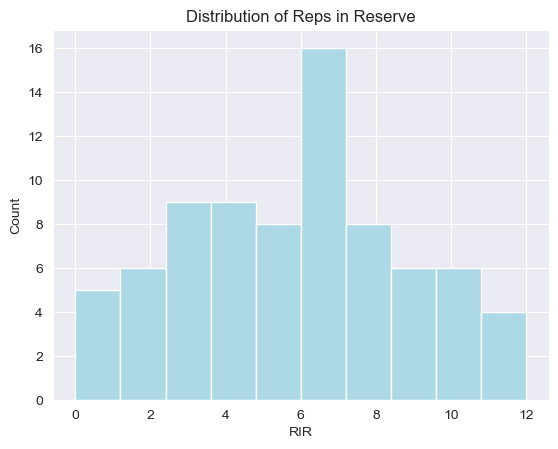

In [4]:
# Distribution of Reps in Reserve
plt.hist(df['RIR'], color='lightblue')
plt.title('Distribution of Reps in Reserve')
plt.xlabel('RIR')
plt.ylabel('Count')
plt.show()

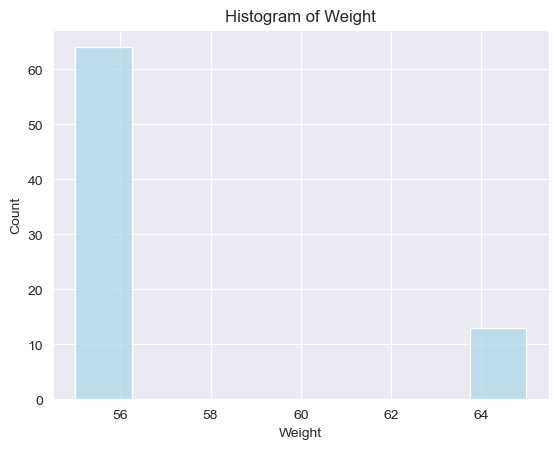

In [5]:
# Distribution of Weights tested
sns.histplot(df['Weight'], color='lightblue')
plt.title('Histogram of Weight')
plt.show()

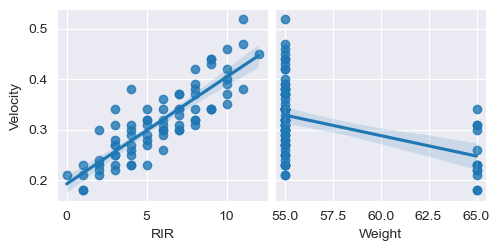

In [6]:
sns.pairplot(df, x_vars=['RIR','Weight'], y_vars='Velocity', kind='reg')
plt.show()

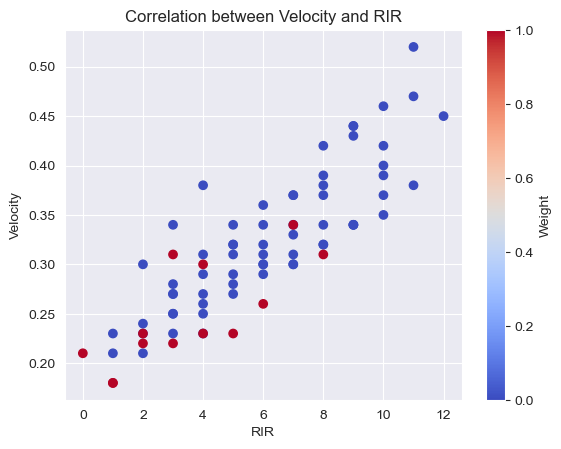

In [7]:
# Create Label Encoder instance
encoder = LabelEncoder()
# Fit Label Encoder on Weight
df['Weight'] = encoder.fit_transform(df['Weight'])
# Scatter plot of correlation between velocity and reps in reserve
plt.scatter(df['RIR'], df['Velocity'], c = df['Weight'],cmap='coolwarm')
plt.xlabel('RIR')
plt.ylabel('Velocity')
plt.title('Correlation between Velocity and RIR')
plt.colorbar(label='Weight')
plt.show()

## Linear Regression

Linear Regression is the most simplistic model, examining the correlation between an independent variable (x) and a dependent variable (y). Nevertheless, linear regression remains fundamental for more advanced techniques/models. 

When utilizing linear regression, there are 4 assumptions that should be met.
1. **Linearity/Additivity** - The independent variable is predictive of the dependent variable with the relationship being linear. Additivity assumes that the relationship between the independent variable and the dependent variable is independent of other relationship/s of other independent variables and dependent variable.
2. **Statistical Independence** - Assumption that errors or residuals are not correlated with each other. In addition, it is also assumed that each observation's error term is independent of the errors of other errors of other observations.
3. **Homoscedasticity** - The assumption is that the variation of residuals is constant and does not systematically change, which is desired with prediction values.
4. **Normality** - The assumption is that residuals follow a normal (Gaussian) distribution. 

In [9]:
# Create instance for Linear Regression
lr = LinearRegression()
# Resahaping variables into 2-D arrays 
x = df['RIR'].values.reshape(-1, 1)
y = df['Velocity'].values.reshape(-1, 1)

In [10]:
# Fit Linear Regression on variables
model = lr.fit(x,y)

In [11]:
# Prediction of Linear Regression model
y_pred = model.predict(x)

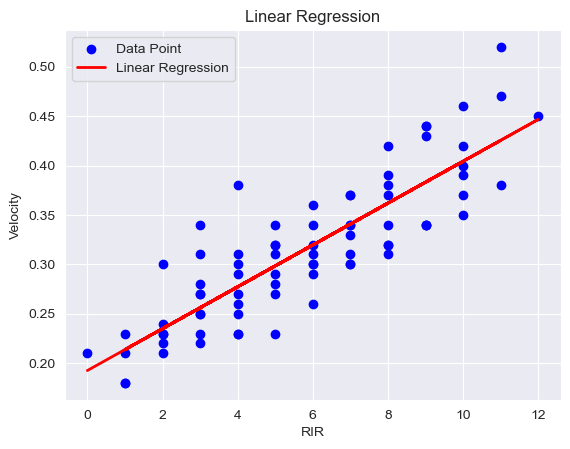

In [12]:
# Visualization of Linear Regression model on the data
plt.scatter(x, y, color='blue', label='Data Point')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('RIR')
plt.ylabel('Velocity')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Evaluation Metrics

- Coefficient of Determination (R^2)
- Sum of Square Regression (SSR)
- Sum of Squares Total (SST)
- Sum of Square Errors (SSE)

##### **The Coefficient of Determination (R^2)**

Measures how well the model fits to the data. The closer to 1 indicates that the independent variable expliains all the variability of the dependent variable. 

In [13]:
# Coefficient of Determination
print("Coefficient of Determination:", model.score(x,y))

Coefficient of Determination: 0.7325757304859226


Residuals are the differences between the dependent variable values and teh corresponding predicted values from the linear regression model. Through examination, we can assess if assumptions are met (i.e. Homscedasticity). 

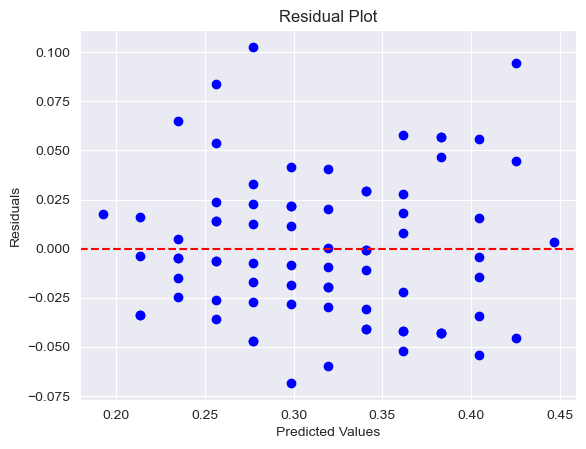

In [14]:
# Calculate residuals
residuals = y - y_pred
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##### **Sum of Squares due to Regression**

The difference between the predicted values and the mean of the dependent variable. A metric to also test how well the linear regression model fits.

In [15]:
# Finding mean of the dependent variable
y_mean = np.mean(y)
# Calculating Sum of Squares due to Regression
ssr = np.sum((y-y_mean)**2)

print("Sum of Squares due to Regression (SSR):", ssr)

Sum of Squares due to Regression (SSR): 0.40072207792207787


##### **Sum of Squares Total**

The squared differences between data point and the mean of the dependent variable to quantify variation. 

In [16]:
sst = np.sum((y - np.mean(y))**2)
print("Sum of Squares Total (SST):", sst)

Sum of Squares Total (SST): 0.40072207792207787


##### **Sum of Squared Errors**

Metric of total unexplained variation or error in the dependent variable in a linear regression model.

In [17]:
# Calculate the differences between y and y_pred
errors = y - y_pred

# Square the differences
squared_errors = errors**2

# Sum up the squared errors to obtain SSE
sse = np.sum(squared_errors)
print("Sum of Squared Errors (SSE):", sse)

Sum of Squared Errors (SSE): 0.1071628089664749


## **Predictions with Linear Regression Model**

In [18]:
# Formating independent variable value
x_point = np.array([5]) # integer is velocity units (m/s)

In [19]:
# Running the Linear Regression Model on the independent variable value
y_pred1 = lr.predict(x_point.reshape(-1, 1))

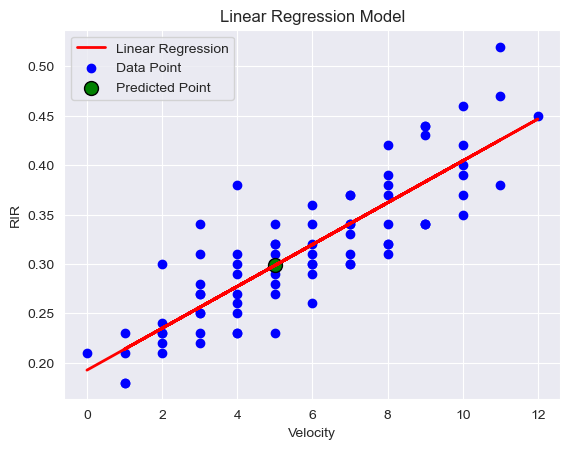

In [20]:
# Visualization of prediction
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.scatter(x, y, color='blue', label='Data Point')
plt.scatter(x_point, y_pred1, color='green', label='Predicted Point', s=100, edgecolor='black')
plt.xlabel('Velocity')
plt.ylabel('RIR')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

##### Evaluation Metrics for Predictions

In [21]:
# Inspect mean, standard deviation, and upper/lower quantiles of Velocity
df['Velocity'].describe()

count    77.000000
mean      0.315195
std       0.072613
min       0.180000
25%       0.260000
50%       0.310000
75%       0.360000
max       0.520000
Name: Velocity, dtype: float64

In [22]:
# Inspect mean, standard deviation, and upper/lower quantiles of RIR
df['RIR'].describe()

count    77.000000
mean      5.792208
std       2.934987
min       0.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      12.000000
Name: RIR, dtype: float64

In [23]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data for x_test
y_test = np.random.uniform(0.15, 0.55, size=20)
y_test = np.sort(y_test)[::-1]  # Sort in descending order

# Generate corresponding random integer data for y_test (RIR)
x_test = np.random.randint(0, 13, size=20)
x_test = np.sort(x_test)[::-1]  # Sort in descending order

# Print the generated data with outliers
print("x_test:", x_test)
print("y_test:", y_test)

x_test: [11 11 11 11 10  9  8  8  8  6  6  6  4  4  3  3  2  2  2  1]
y_test: [0.53796394 0.53028572 0.49647046 0.48297706 0.44279758 0.43322903
 0.390446   0.38946339 0.35990257 0.32277801 0.29981605 0.2716969
 0.26649166 0.23493564 0.2233618  0.22272999 0.21240746 0.21239781
 0.17323344 0.1582338 ]


In [24]:
y_pred_test = model.predict(x_test.reshape(-1,1))

r2 = model.score(x_test.reshape(-1,1), y_test.reshape(-1,1))
print("Coefficient of Determination (R-squared):", r2)

Coefficient of Determination (R-squared): 0.8185260453515881


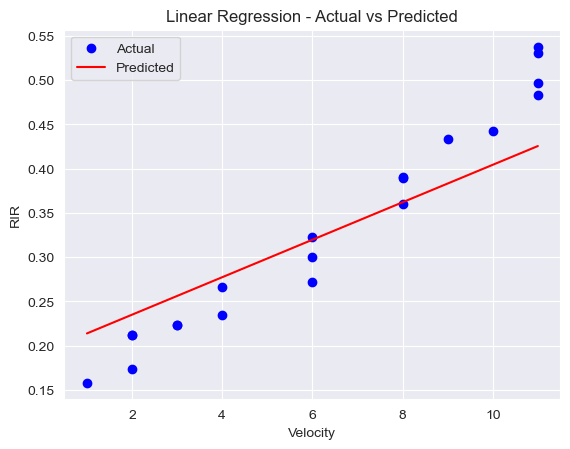

In [25]:
# Visualize Actual vs Predicted
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot (x_test, y_pred_test, color='red', label='Predicted')
plt.xlabel('Velocity')
plt.ylabel('RIR')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

#### Evaluation Metrics for Predictions

- Mean Absolute Error (MAE) - Average of the absolute differences between the predicted and actual values. This metric is not sensitive to outliers.
- Mean Squared Error (MSE) - Average of squared differences between the prediction and actual values. The squaring of the differences penalized larger errors more, making this metric sensitive to outliers.
- Root Mean Squared Error (RMSE) - Square root of the average squared difference between the predicted and actual values. This metric shows the typical magnitude of errors.

In [26]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.042228126845513574


In [27]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0026114145036733854


In [28]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.051102000975239564


## Practical Applications

Through the data analysis and employment of linear and polynomial regression models, meaninful conclusions and predictions can be made between the relationship of reps in reserve (RIR) and velocity.

**Polynomial Regression**
- The reason for polynomial regression in velocity based resistance training is because it takes individualization and fatigue into account. Due to the variations in muscle fiber genetic makeup and training history, individuals differ in rate of fatigue and fatigue thresholds.
- However, most of the research has seen very little differences between the polynomial regression and linear regression models, and can in most cases would be simpler to use linear regression. 

In [29]:
# Re-introduce variables and format correctly
x = df['RIR'].values.reshape(-1, 1)
y = df['Velocity'].values.ravel()

In [30]:
# Re-introduce linear model on variables
model = LinearRegression().fit(x,y)

In [31]:
# Re-introduce model prediction
y_pred = model.predict(x)

In [32]:
# Create Instance for Polynomial Regression model
degree=2
poly_features = PolynomialFeatures(degree=degree)

In [33]:
# Creates x into a polynomial feature matrix
x_poly = poly_features.fit_transform(x)
# Fit Polynomial Regression model
poly_model = lr.fit(x_poly, y)

In [34]:
# Polynomial Regression model prediction
y_poly_pred = poly_model.predict(x_poly)

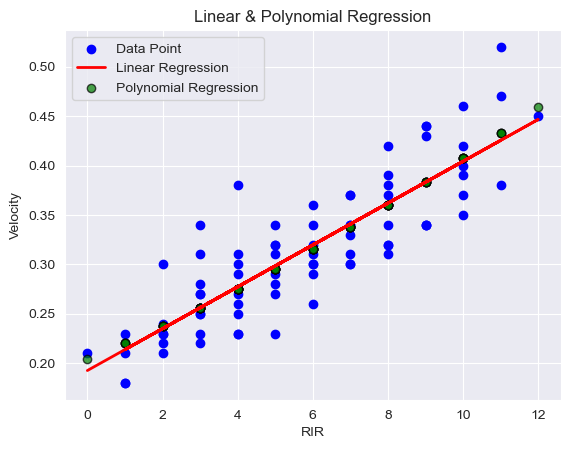

<Figure size 640x480 with 0 Axes>

In [35]:
# Visualize the results
plt.scatter(x, y, color='blue', label='Data Point')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.scatter(x, y_poly_pred, color='green',label='Polynomial Regression', marker='o', alpha=0.7, edgecolor='black', linewidth=1)
plt.xlabel('RIR')
plt.ylabel('Velocity')
plt.title('Linear & Polynomial Regression')
plt.legend()
plt.show()

plt.savefig('Lineplot.png')

In [36]:
# Generate the range of RIR values from 0 to 10
rir_range = range(0, 11)

# Create a DataFrame with the RIR values
df_results = pd.DataFrame({'RIR': rir_range})

# # Add columns for the predicted velocities
df_results['Linear Regression'] = model.predict(df_results['RIR'].values.reshape(-1, 1)).round(2)
df_results['Polynomial Regression'] = poly_model.predict(poly_features.transform(df_results['RIR'].values.reshape(-1, 1))).round(2)

# # Display the DataFrame
print(df_results)

    RIR  Linear Regression  Polynomial Regression
0     0               0.19                   0.20
1     1               0.21                   0.22
2     2               0.23                   0.24
3     3               0.26                   0.26
4     4               0.28                   0.28
5     5               0.30                   0.30
6     6               0.32                   0.32
7     7               0.34                   0.34
8     8               0.36                   0.36
9     9               0.38                   0.38
10   10               0.40                   0.41


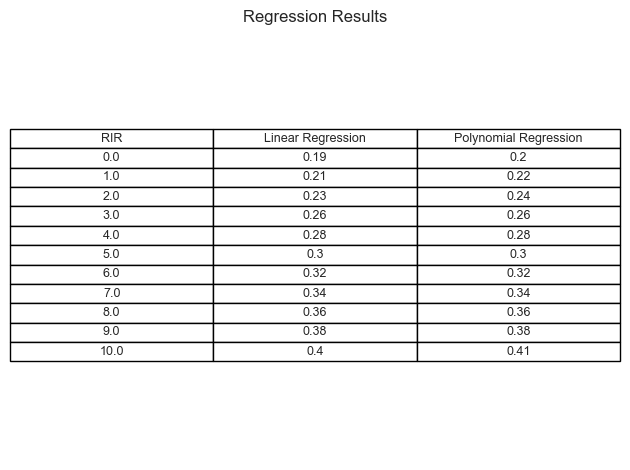

Plot saved as RIRVelocityProfile.png


<Figure size 640x480 with 0 Axes>

In [37]:
# Create a figure and axes
fig, axs = plt.subplots()

# Create the table using axs.table
table_data = df_results.values.tolist()
header = df_results.columns.tolist()
axs.table(cellText=table_data, colLabels=header, cellLoc='center', loc='center')

# Hide axis labels and ticks
axs.axis('off')

# Set title
axs.set_title('Regression Results')
plt.tight_layout()
# Show the plot
plt.show()

plt.savefig('RIRVelocityProfile.png')
print('Plot saved as RIRVelocityProfile.png')